#**1. Import Dependencies**

In [1]:
import numpy as py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#**2. Get the data**

In [ ]:
# Read the CSV file, specifying the delimiter and handling missing data
credit_card_data = pd.read_csv('/content/creditcard.csv', error_bad_lines=False)

# Print the first 5 rows of the DataFrame
print(credit_card_data.head())


<ipython-input-4-9cc52f0322d0>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  credit_card_data = pd.read_csv('/content/creditcard (1).csv', error_bad_lines=False)
Skipping line 5966: expected 31 fields, saw 51
Skipping line 11956: expected 31 fields, saw 42
Skipping line 15937: expected 31 fields, saw 40
Skipping line 19911: expected 31 fields, saw 33
Skipping line 21905: expected 31 fields, saw 46
Skipping line 25880: expected 31 fields, saw 49

Skipping line 37764: expected 31 fields, saw 39
Skipping line 41725: expected 31 fields, saw 59
Skipping line 45685: expected 31 fields, saw 47
Skipping line 51626: expected 31 fields, saw 51
Skipping line 55589: expected 31 fields, saw 36
Skipping line 59549: expected 31 fields, saw 32
Skipping line 63510: expected 31 fields, saw 37
Skipping line 65490: expected 31 fields, saw 41

Skipping line 69453: expected 31 fields, saw 34
Skipping line 71434

   Time        V1                   V2        V3        V4        V5  \
0   0.0 -1.359807  -0.0727811733098497  2.536347  1.378155 -0.338321   
1   0.0  1.191857     0.26615071205963  0.166480  0.448154  0.060018   
2   1.0 -1.358354    -1.34016307473609  1.773209  0.379780 -0.503198   
3   1.0 -0.966272   -0.185226008082898  1.792993 -0.863291 -0.010309   
4   2.0 -1.158233    0.877736754848451  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...                   V21  \
0  0.462388  0.239599  0.098698  0.363787  ...    -0.018306777944153   
1 -0.082361 -0.078803  0.085102 -0.255425  ...    -0.225775248033138   
2  1.800499  0.791461  0.247676 -1.514654  ...     0.247998153469754   
3  1.247203  0.237609  0.377436 -1.387024  ...    -0.108300452035545   
4  0.095921  0.592941 -0.270533  0.817739  ...  -0.00943069713232919   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.1335

<ipython-input-4-9cc52f0322d0>:2: DtypeWarning: Columns (2,13,21) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_card_data = pd.read_csv('/content/creditcard (1).csv', error_bad_lines=False)


In [ ]:
# Print the last 5 rows of the DataFrame
print(credit_card_data.tail())

          Time        V1        V2        V3        V4        V5        V6  \
99142  47945.0  1.138100  0.186695  0.224979  1.098891 -0.149107 -0.494817   
99143  47946.0 -0.646913  1.130799  1.050571 -0.569363  0.844107  0.227605   
99144  47946.0  1.214047  0.217891  0.399390  0.945208 -0.101512 -0.108244   
99145  47946.0 -0.637264  1.187105  0.911446  0.827789 -0.241755 -0.431410   
99146  47946.0 -1.054793  0.820159  0.709861 -0.071631       NaN       NaN   

             V7        V8        V9  ...       V21       V22       V23  \
99142  0.158646 -0.082146  0.031110  ...  0.070575  0.193698 -0.093600   
99143  0.808902 -0.130225 -0.290188  ... -0.327854 -0.647464 -0.188020   
99144 -0.099976  0.071885  0.248587  ...  -0.29318 -0.859018  0.125645   
99145  0.482341  0.395142 -1.095934  ...  0.272207  0.604289 -0.037705   
99146       NaN       NaN       NaN  ...       NaN       NaN       NaN   

            V24       V25       V26       V27       V28  Amount  Class  
99142  0.0780

In [ ]:
# dataframe information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99147 entries, 0 to 99146
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    99147 non-null  float64
 1   V1      99147 non-null  float64
 2   V2      99147 non-null  object 
 3   V3      99147 non-null  float64
 4   V4      99147 non-null  float64
 5   V5      99146 non-null  float64
 6   V6      99146 non-null  float64
 7   V7      99146 non-null  float64
 8   V8      99145 non-null  float64
 9   V9      99144 non-null  float64
 10  V10     99143 non-null  float64
 11  V11     99141 non-null  float64
 12  V12     99141 non-null  float64
 13  V13     99141 non-null  object 
 14  V14     99140 non-null  float64
 15  V15     99139 non-null  float64
 16  V16     99138 non-null  float64
 17  V17     99136 non-null  float64
 18  V18     99136 non-null  float64
 19  V19     99136 non-null  float64
 20  V20     99134 non-null  float64
 21  V21     99133 non-null  object 
 22

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time       0
V1         0
V2         0
V3         0
V4         0
V5         1
V6         1
V7         1
V8         2
V9         3
V10        4
V11        6
V12        6
V13        6
V14        7
V15        8
V16        9
V17       11
V18       11
V19       11
V20       13
V21       14
V22       15
V23       15
V24       15
V25       16
V26       18
V27       19
V28       20
Amount    24
Class     26
dtype: int64

#**3. Distribution of legit transactions & fraudulent transactions**

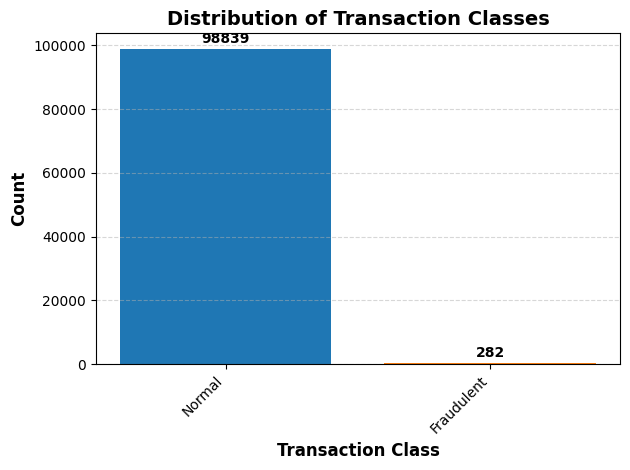

In [ ]:
import matplotlib.pyplot as plt

class_counts = credit_card_data["Class"].value_counts()

colors = ["#1f77b4", "#ff7f0e"]
plt.bar(class_counts.index, class_counts.values, color=colors)

plt.xlabel("Transaction Class", fontweight="bold", fontsize=12)
plt.ylabel("Count", fontweight="bold", fontsize=12)
plt.title("Distribution of Transaction Classes", fontweight="bold", fontsize=14)

plt.xticks(class_counts.index, ["Normal", "Fraudulent"], rotation=45, ha="right", fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.5)

for i, count in enumerate(class_counts.values):
    plt.text(i, count + 1000, str(count), ha="center", va="bottom", fontweight="bold", fontsize=10)

plt.tight_layout()
plt.show()

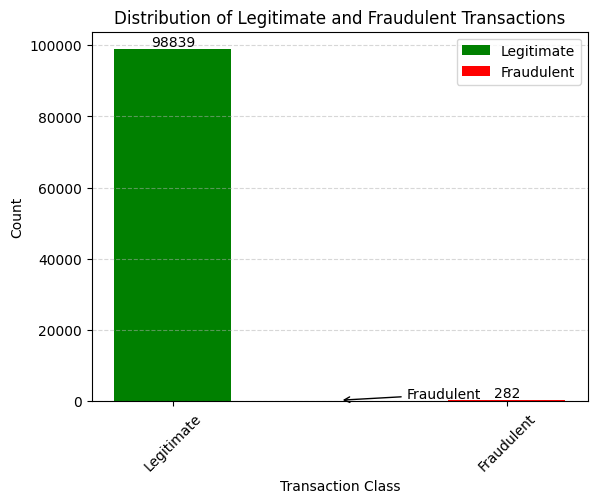

In [ ]:
import matplotlib.pyplot as plt

legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

legit_count = len(legit)
fraud_count = len(fraud)

bar_positions = [0, 1]
bar_width = 0.35

fig, ax1 = plt.subplots()

ax1.bar(bar_positions[0], legit_count, bar_width, color='green', label='Legitimate')
ax1.bar(bar_positions[1], fraud_count, bar_width, color='red', label='Fraudulent')

ax1.set_xlabel('Transaction Class')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Legitimate and Fraudulent Transactions')

ax1.set_xticks(bar_positions)
ax1.set_xticklabels(['Legitimate', 'Fraudulent'])

ax1.legend()

ax1.text(bar_positions[0], legit_count, str(legit_count), ha='center', va='bottom')
ax1.text(bar_positions[1], fraud_count, str(fraud_count), ha='center', va='bottom')

ax1.grid(axis='y', linestyle='--', alpha=0.5)

plt.xticks(rotation=45)

plt.annotate('Fraudulent', xy=(0.5, fraud_count), xytext=(0.7, fraud_count + 500),
arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()



In [ ]:
print(legit.shape)
print(fraud.shape)

(98839, 31)
(282, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    98839.000000
mean        96.440028
std        260.571172
min          0.000000
25%          7.980000
50%         26.940000
75%         89.000000
max      12910.930000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     282.000000
mean       96.152128
std       213.153020
min         0.000000
25%         1.000000
50%        11.385000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

#**4. Compare the values for both transactions**

<ipython-input-13-b534a85890cc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_means = credit_card_data.groupby('Class').mean()


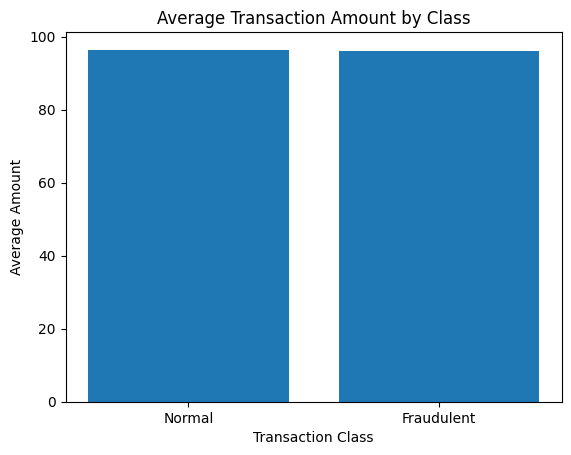

In [ ]:
import matplotlib.pyplot as plt

class_means = credit_card_data.groupby('Class').mean()

plt.bar(class_means.index, class_means['Amount'])

plt.xlabel("Transaction Class")
plt.ylabel("Average Amount")
plt.title("Average Transaction Amount by Class")

plt.xticks(class_means.index, ["Normal", "Fraudulent"])

plt.show()

#**5. Under-Sampling**


In [ ]:
# Build a sample dataset containing similar distribution 
# of normal transactions and fraudulent transactions
# number of Fraudulent Transaction - 731
legit_sample = legit.sample(n=731)

In [ ]:
# Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95887,43593.0,-0.660322,1.03279100564278,1.082341,0.944963,-0.460496,-0.001552,1.037260,0.079273,-0.192663,...,-0.17324,-0.331609,0.078448,-0.006142,-0.042470,-0.416678,0.467405,0.134475,129.70,0.0
46361,35949.0,1.186527,0.31306,0.200513,1.678970,-0.050205,-0.445124,0.165314,-0.043547,-0.606329,...,-0.063996,-0.272409,0.024617,0.094243,0.288406,0.970634,-0.092555,-0.002575,15.99,0.0
89485,45144.0,-11.999298,-13.9568366855898,0.173530,2.824796,8.047599,-4.905405,-4.069815,-0.933125,2.409828,...,-1.718835,0.088198,-2.264306,0.268877,-0.678225,0.896077,-0.246275,3.628542,595.58,0.0
2373,11177.0,0.941270,0.0881820171854246,0.295006,1.435827,-0.208409,-0.825199,0.446951,-0.447491,1.002858,...,-0.00791949226879717,-0.010321,-0.246794,0.389563,0.660980,-0.389446,-0.032424,0.045139,163.41,0.0
33197,28625.0,-3.736432,3.370888,-5.460398,1.954062,-1.960729,-2.208190,-1.171518,2.659153,-0.284688,...,-0.099896,-0.543020,-0.040642,0.052004,-0.120554,-0.379438,0.136217,-0.237987,89.99,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95359,43369.0,-3.365319,2.42650326490524,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,...,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,88.00,1.0
95651,43494.0,-1.278138,0.716241580332591,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,...,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,24.90,1.0
98319,47545.0,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,...,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,0.76,1.0
98864,47826.0,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,...,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,7.58,1.0
99086,47923.0,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,...,0.40273,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,0.76,1.0


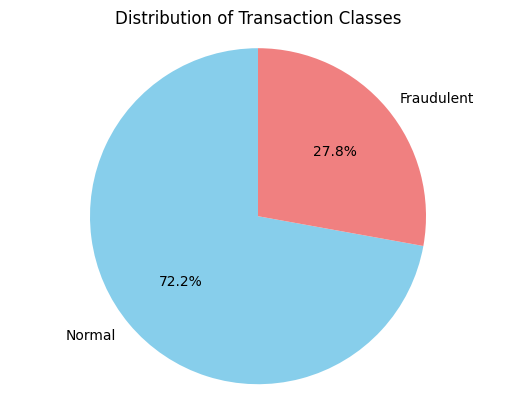

In [ ]:
import matplotlib.pyplot as plt

class_counts = new_dataset['Class'].value_counts()

plt.pie(class_counts, labels=['Normal', 'Fraudulent'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

plt.title('Distribution of Transaction Classes')

plt.axis('equal')

plt.show()


In [ ]:
new_dataset.groupby('Class').mean()

<ipython-input-19-586b59598b15>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_dataset.groupby('Class').mean()


,Time,V1,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,31926.807114,-0.137625,0.706929,0.229670,-0.204766,0.146888,-0.137250,0.082236,0.036808,-0.039229,...,0.007350,0.049534,-0.122940,-0.043843,-0.015081,0.131303,0.005482,-0.017977,0.011074,91.591286
1.0,29360.000000,-7.986823,-10.529847,5.884599,-5.926929,-2.254703,-8.322726,3.875556,-3.663883,-7.557557,...,0.979829,0.472092,-0.214023,-0.291956,-0.074127,0.258069,0.130705,0.602472,0.013945,96.152128


#**6. Splitting the data into Features & Targets**


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

          Time         V1                  V2        V3        V4        V5  \
95887  43593.0  -0.660322    1.03279100564278  1.082341  0.944963 -0.460496   
46361  35949.0   1.186527             0.31306  0.200513  1.678970 -0.050205   
89485  45144.0 -11.999298   -13.9568366855898  0.173530  2.824796  8.047599   
2373   11177.0   0.941270  0.0881820171854246  0.295006  1.435827 -0.208409   
33197  28625.0  -3.736432            3.370888 -5.460398  1.954062 -1.960729   
...        ...        ...                 ...       ...       ...       ...   
95359  43369.0  -3.365319    2.42650326490524 -3.752227  0.276017 -2.305870   
95651  43494.0  -1.278138   0.716241580332591 -1.143279  0.217805 -1.293890   
98319  47545.0   1.176716            0.557091 -0.490800  0.756424  0.249192   
98864  47826.0  -0.887287            1.390002  1.219686  1.661425  1.009228   
99086  47923.0   0.364377            1.443523 -2.220907  2.036985 -1.237055   

             V6        V7        V8        V9  ... 

In [ ]:
print(Y)

95887    0.0
46361    0.0
89485    0.0
2373     0.0
33197    0.0
        ... 
95359    1.0
95651    1.0
98319    1.0
98864    1.0
99086    1.0
Name: Class, Length: 1013, dtype: float64


In [ ]:
# Split the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1013, 30) (810, 30) (203, 30)


#**7. Model training**

In [ ]:
# Logistic Regression
model = LogisticRegression(max_iter=10000)

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

#**8. Model Evaluation**

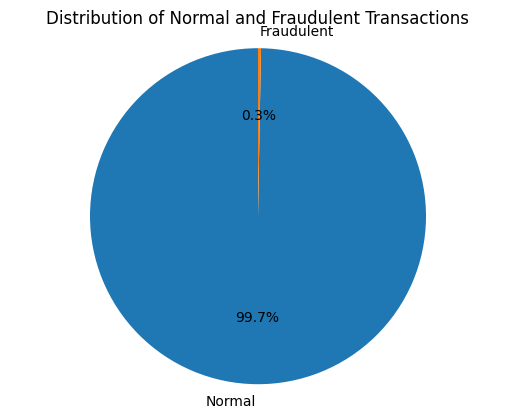

In [ ]:
import matplotlib.pyplot as plt

counts = credit_card_data['Class'].value_counts()

plt.pie(counts, labels=['Normal', 'Fraudulent'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Normal and Fraudulent Transactions')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Predict class labels for the training data
predicted_labels = model.predict(X_train)

# Calculate the training data accuracy score
training_data_accuracy = accuracy_score(predicted_labels, Y_train)

# Print the training data accuracy score
print("Training Data Accuracy:", training_data_accuracy)


Training Data Accuracy: 0.9814814814814815


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9802955665024631


In [ ]:
# A high accuracy score on both the training and testing datasets indicates 
# that the model is performing well and can be useful for credit card fraud detection

# **Random Forest**

Model training starts........
Accuracy of model on test dataset: 0.9901477832512315
Confusion Matrix :- 
 [[146   0]
 [  2  55]]
Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       146
         1.0       1.00      0.96      0.98        57

    accuracy                           0.99       203
   macro avg       0.99      0.98      0.99       203
weighted avg       0.99      0.99      0.99       203



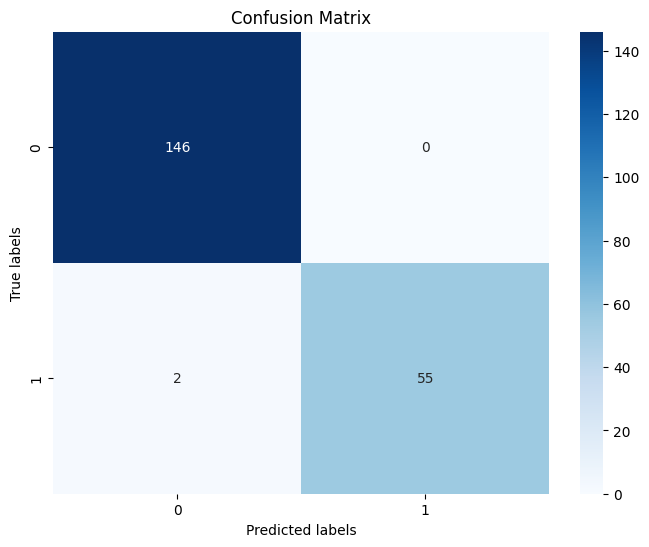

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def random_forest_classifier(X_train, X_test, Y_train, Y_test):
    # initialize object for RandomForestClassifier class
    rf_classifier = RandomForestClassifier(n_estimators=50)
    # train model using fit method
    print("Model training starts........")
    rf_classifier.fit(X_train, Y_train.values.ravel())
    acc_score = rf_classifier.score(X_test, Y_test)
    print(f'Accuracy of model on test dataset: {acc_score}')
    # predict result using test dataset
    y_pred = rf_classifier.predict(X_test)
    # confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    print(f"Confusion Matrix :- \n {cm}")
    # classification report for f1-score
    print(f"Classification Report :- \n {classification_report(Y_test, y_pred)}")
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()


# calling random_forest_classifier
random_forest_classifier(X_train, X_test, Y_train, Y_test)



# **Decision Tree Algorithm**

In [ ]:
class_counts = credit_card_data['Class'].value_counts()
print("Number of samples for each class:")
print(class_counts)
non_fraud = class_counts[0]
fraud = class_counts[1]
print("Non-fraudulent Numbers:", non_fraud)
print("Fraudulent Numbers:", fraud)

Number of samples for each class:
0.0    98839
1.0      282
Name: Class, dtype: int64
Non-fraudulent Numbers: 98839
Fraudulent Numbers: 282


In [ ]:
import numpy as np
## Equalize the number of samples for both target classes
# Get indexes of non-fraudulent samples
nonfraud_indices = credit_card_data[credit_card_data.Class == 0].index
fraud_indices = np.array(credit_card_data[credit_card_data.Class == 1].index)
# Randomly select non-fraudulent samples that are equal to the number of fraudulent samples
random_normal_indices = np.random.choice(nonfraud_indices, size=len(fraud_indices), replace=False)
random_normal_indices = np.array(random_normal_indices)

In [ ]:
## Undersampling techniques

# Concatenate the indices of fraud and non-fraud transactions
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# Extract all features for the under-sampled indices
under_sample_data = credit_card_data.iloc[under_sample_indices, :]

# Split the under-sampled data into features (X) and target (y)
X_undersample_data = under_sample_data.drop(['Class'], axis=1)
y_undersample_data = under_sample_data['Class']

# Split the dataset into train and test datasets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_undersample_data, y_undersample_data, test_size=0.2, random_state=0)


Model training starts........
Accuracy of model on test dataset: 1.0
Confusion Matrix:
[[62  0]
 [ 0 51]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        62
         1.0       1.00      1.00      1.00        51

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

AROC score: 1.0


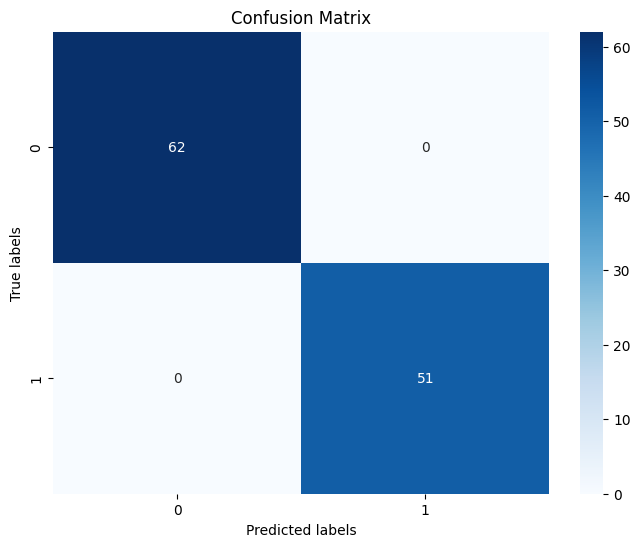

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def decision_tree_classification(X_train, X_test, Y_train, Y_test):
    # Initialize object for DecisionTreeClassifier class
    dt_classifier = DecisionTreeClassifier(criterion='gini')
    # Train model using fit method
    print("Model training starts........")
    dt_classifier.fit(X_train, Y_train.values.ravel())
    print("Model training completed")
    acc_score = dt_classifier.score(X_test, Y_test)
    print(f'Accuracy of model on test dataset: {acc_score}')
    # Predict result using test dataset
    y_pred = dt_classifier.predict(X_test)
    # Confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    # Classification report for f1-score
    print(f"Classification Report:\n{classification_report(Y_test, y_pred)}")
    # AROC score
    aroc_score = roc_auc_score(Y_test, y_pred)
    print(f"AROC score: {aroc_score}")

    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()


# Calling decision_tree_classification function
decision_tree_classification(X_train_sample, X_test_sample, y_train_sample, y_test_sample)
